# Scalable Diffusion Models with Transformer (DiT)

This notebook samples from pre-trained DiT models. DiTs are class-conditional latent diffusion models trained on ImageNet that use transformers in place of U-Nets as the DDPM backbone. DiT outperforms all prior diffusion models on the ImageNet benchmarks.

[Project Page](https://www.wpeebles.com/DiT) | [HuggingFace Space](https://huggingface.co/spaces/wpeebles/DiT) | [Paper](http://arxiv.org/abs/2212.09748) | [GitHub](github.com/facebookresearch/DiT)

# 1. Setup

We recommend using GPUs (Runtime > Change runtime type > Hardware accelerator > GPU). Run this cell to clone the DiT GitHub repo and setup PyTorch. You only have to run this once.

In [ ]:
!git clone https://github.com/facebookresearch/DiT.git
import DiT, os
os.chdir('DiT')
os.environ['PYTHONPATH'] = '/env/python:/content/DiT'
!pip install diffusers timm --upgrade
# DiT imports:
import torch
from torchvision.utils import save_image
from diffusion import create_diffusion
from diffusers.models import AutoencoderKL
from download import find_model
from models import DiT_XL_2
from PIL import Image
from IPython.display import display
torch.set_grad_enabled(False)
device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cpu":
    print("GPU not found. Using CPU instead.")

Cloning into 'DiT'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 102 (delta 57), reused 33 (delta 33), pack-reused 20 (from 1)
Receiving objects: 100% (102/102), 6.36 MiB | 10.79 MiB/s, done.
Resolving deltas: 100% (57/57), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

GPU not found. Using CPU instead.


# Download DiT-XL/2 Models

You can choose between a 512x512 model and a 256x256 model. You can swap-out the LDM VAE, too.

In [ ]:
image_size = 256 #@param [256, 512]
vae_model = "stabilityai/sd-vae-ft-ema" #@param ["stabilityai/sd-vae-ft-mse", "stabilityai/sd-vae-ft-ema"]
latent_size = int(image_size) // 8
# Load model:
model = DiT_XL_2(input_size=latent_size).to(device)
state_dict = find_model(f"DiT-XL-2-{image_size}x{image_size}.pt")
model.load_state_dict(state_dict)
model.eval() # important!
vae = AutoencoderKL.from_pretrained(vae_model).to(device)

In [ ]:
state_dict = find_model(f"DiT-XL-2-{image_size}x{image_size}.pt")
model.load_state_dict(state_dict)
model.eval() # important!
vae = AutoencoderKL.from_pretrained(vae_model).to(device)

RuntimeError: Error(s) in loading state_dict for DiT:
	Missing key(s) in state_dict: "blocks.0.attn.qkv_proj.weight", "blocks.0.attn.qkv_proj.bias", "blocks.0.attn.out_proj.weight", "blocks.0.attn.out_proj.bias", "blocks.1.attn.qkv_proj.weight", "blocks.1.attn.qkv_proj.bias", "blocks.1.attn.out_proj.weight", "blocks.1.attn.out_proj.bias", "blocks.2.attn.qkv_proj.weight", "blocks.2.attn.qkv_proj.bias", "blocks.2.attn.out_proj.weight", "blocks.2.attn.out_proj.bias", "blocks.3.attn.qkv_proj.weight", "blocks.3.attn.qkv_proj.bias", "blocks.3.attn.out_proj.weight", "blocks.3.attn.out_proj.bias", "blocks.4.attn.qkv_proj.weight", "blocks.4.attn.qkv_proj.bias", "blocks.4.attn.out_proj.weight", "blocks.4.attn.out_proj.bias", "blocks.5.attn.qkv_proj.weight", "blocks.5.attn.qkv_proj.bias", "blocks.5.attn.out_proj.weight", "blocks.5.attn.out_proj.bias", "blocks.6.attn.qkv_proj.weight", "blocks.6.attn.qkv_proj.bias", "blocks.6.attn.out_proj.weight", "blocks.6.attn.out_proj.bias", "blocks.7.attn.qkv_proj.weight", "blocks.7.attn.qkv_proj.bias", "blocks.7.attn.out_proj.weight", "blocks.7.attn.out_proj.bias", "blocks.8.attn.qkv_proj.weight", "blocks.8.attn.qkv_proj.bias", "blocks.8.attn.out_proj.weight", "blocks.8.attn.out_proj.bias", "blocks.9.attn.qkv_proj.weight", "blocks.9.attn.qkv_proj.bias", "blocks.9.attn.out_proj.weight", "blocks.9.attn.out_proj.bias", "blocks.10.attn.qkv_proj.weight", "blocks.10.attn.qkv_proj.bias", "blocks.10.attn.out_proj.weight", "blocks.10.attn.out_proj.bias", "blocks.11.attn.qkv_proj.weight", "blocks.11.attn.qkv_proj.bias", "blocks.11.attn.out_proj.weight", "blocks.11.attn.out_proj.bias", "blocks.12.attn.qkv_proj.weight", "blocks.12.attn.qkv_proj.bias", "blocks.12.attn.out_proj.weight", "blocks.12.attn.out_proj.bias", "blocks.13.attn.qkv_proj.weight", "blocks.13.attn.qkv_proj.bias", "blocks.13.attn.out_proj.weight", "blocks.13.attn.out_proj.bias", "blocks.14.attn.qkv_proj.weight", "blocks.14.attn.qkv_proj.bias", "blocks.14.attn.out_proj.weight", "blocks.14.attn.out_proj.bias", "blocks.15.attn.qkv_proj.weight", "blocks.15.attn.qkv_proj.bias", "blocks.15.attn.out_proj.weight", "blocks.15.attn.out_proj.bias", "blocks.16.attn.qkv_proj.weight", "blocks.16.attn.qkv_proj.bias", "blocks.16.attn.out_proj.weight", "blocks.16.attn.out_proj.bias", "blocks.17.attn.qkv_proj.weight", "blocks.17.attn.qkv_proj.bias", "blocks.17.attn.out_proj.weight", "blocks.17.attn.out_proj.bias", "blocks.18.attn.qkv_proj.weight", "blocks.18.attn.qkv_proj.bias", "blocks.18.attn.out_proj.weight", "blocks.18.attn.out_proj.bias", "blocks.19.attn.qkv_proj.weight", "blocks.19.attn.qkv_proj.bias", "blocks.19.attn.out_proj.weight", "blocks.19.attn.out_proj.bias", "blocks.20.attn.qkv_proj.weight", "blocks.20.attn.qkv_proj.bias", "blocks.20.attn.out_proj.weight", "blocks.20.attn.out_proj.bias", "blocks.21.attn.qkv_proj.weight", "blocks.21.attn.qkv_proj.bias", "blocks.21.attn.out_proj.weight", "blocks.21.attn.out_proj.bias", "blocks.22.attn.qkv_proj.weight", "blocks.22.attn.qkv_proj.bias", "blocks.22.attn.out_proj.weight", "blocks.22.attn.out_proj.bias", "blocks.23.attn.qkv_proj.weight", "blocks.23.attn.qkv_proj.bias", "blocks.23.attn.out_proj.weight", "blocks.23.attn.out_proj.bias", "blocks.24.attn.qkv_proj.weight", "blocks.24.attn.qkv_proj.bias", "blocks.24.attn.out_proj.weight", "blocks.24.attn.out_proj.bias", "blocks.25.attn.qkv_proj.weight", "blocks.25.attn.qkv_proj.bias", "blocks.25.attn.out_proj.weight", "blocks.25.attn.out_proj.bias", "blocks.26.attn.qkv_proj.weight", "blocks.26.attn.qkv_proj.bias", "blocks.26.attn.out_proj.weight", "blocks.26.attn.out_proj.bias", "blocks.27.attn.qkv_proj.weight", "blocks.27.attn.qkv_proj.bias", "blocks.27.attn.out_proj.weight", "blocks.27.attn.out_proj.bias". 
	Unexpected key(s) in state_dict: "blocks.0.attn.qkv.weight", "blocks.0.attn.qkv.bias", "blocks.0.attn.proj.weight", "blocks.0.attn.proj.bias", "blocks.1.attn.qkv.weight", "blocks.1.attn.qkv.bias", "blocks.1.attn.proj.weight", "blocks.1.attn.proj.bias", "blocks.2.attn.qkv.weight", "blocks.2.attn.qkv.bias", "blocks.2.attn.proj.weight", "blocks.2.attn.proj.bias", "blocks.3.attn.qkv.weight", "blocks.3.attn.qkv.bias", "blocks.3.attn.proj.weight", "blocks.3.attn.proj.bias", "blocks.4.attn.qkv.weight", "blocks.4.attn.qkv.bias", "blocks.4.attn.proj.weight", "blocks.4.attn.proj.bias", "blocks.5.attn.qkv.weight", "blocks.5.attn.qkv.bias", "blocks.5.attn.proj.weight", "blocks.5.attn.proj.bias", "blocks.6.attn.qkv.weight", "blocks.6.attn.qkv.bias", "blocks.6.attn.proj.weight", "blocks.6.attn.proj.bias", "blocks.7.attn.qkv.weight", "blocks.7.attn.qkv.bias", "blocks.7.attn.proj.weight", "blocks.7.attn.proj.bias", "blocks.8.attn.qkv.weight", "blocks.8.attn.qkv.bias", "blocks.8.attn.proj.weight", "blocks.8.attn.proj.bias", "blocks.9.attn.qkv.weight", "blocks.9.attn.qkv.bias", "blocks.9.attn.proj.weight", "blocks.9.attn.proj.bias", "blocks.10.attn.qkv.weight", "blocks.10.attn.qkv.bias", "blocks.10.attn.proj.weight", "blocks.10.attn.proj.bias", "blocks.11.attn.qkv.weight", "blocks.11.attn.qkv.bias", "blocks.11.attn.proj.weight", "blocks.11.attn.proj.bias", "blocks.12.attn.qkv.weight", "blocks.12.attn.qkv.bias", "blocks.12.attn.proj.weight", "blocks.12.attn.proj.bias", "blocks.13.attn.qkv.weight", "blocks.13.attn.qkv.bias", "blocks.13.attn.proj.weight", "blocks.13.attn.proj.bias", "blocks.14.attn.qkv.weight", "blocks.14.attn.qkv.bias", "blocks.14.attn.proj.weight", "blocks.14.attn.proj.bias", "blocks.15.attn.qkv.weight", "blocks.15.attn.qkv.bias", "blocks.15.attn.proj.weight", "blocks.15.attn.proj.bias", "blocks.16.attn.qkv.weight", "blocks.16.attn.qkv.bias", "blocks.16.attn.proj.weight", "blocks.16.attn.proj.bias", "blocks.17.attn.qkv.weight", "blocks.17.attn.qkv.bias", "blocks.17.attn.proj.weight", "blocks.17.attn.proj.bias", "blocks.18.attn.qkv.weight", "blocks.18.attn.qkv.bias", "blocks.18.attn.proj.weight", "blocks.18.attn.proj.bias", "blocks.19.attn.qkv.weight", "blocks.19.attn.qkv.bias", "blocks.19.attn.proj.weight", "blocks.19.attn.proj.bias", "blocks.20.attn.qkv.weight", "blocks.20.attn.qkv.bias", "blocks.20.attn.proj.weight", "blocks.20.attn.proj.bias", "blocks.21.attn.qkv.weight", "blocks.21.attn.qkv.bias", "blocks.21.attn.proj.weight", "blocks.21.attn.proj.bias", "blocks.22.attn.qkv.weight", "blocks.22.attn.qkv.bias", "blocks.22.attn.proj.weight", "blocks.22.attn.proj.bias", "blocks.23.attn.qkv.weight", "blocks.23.attn.qkv.bias", "blocks.23.attn.proj.weight", "blocks.23.attn.proj.bias", "blocks.24.attn.qkv.weight", "blocks.24.attn.qkv.bias", "blocks.24.attn.proj.weight", "blocks.24.attn.proj.bias", "blocks.25.attn.qkv.weight", "blocks.25.attn.qkv.bias", "blocks.25.attn.proj.weight", "blocks.25.attn.proj.bias", "blocks.26.attn.qkv.weight", "blocks.26.attn.qkv.bias", "blocks.26.attn.proj.weight", "blocks.26.attn.proj.bias", "blocks.27.attn.qkv.weight", "blocks.27.attn.qkv.bias", "blocks.27.attn.proj.weight", "blocks.27.attn.proj.bias". 

In [ ]:
import time

def benchmark_sampling(model, num_images=50):
    """Measure the time taken to generate 'num_images' samples."""
    model.eval()
    with torch.no_grad():
        # Create dummy inputs:
        z = torch.randn(num_images, 4, latent_size, latent_size, device=device)
        y = torch.randint(0, 1000, (num_images,), device=device)

        # Benchmarking:
        start_time = time.time()
        samples = diffusion.p_sample_loop(
            model.forward_with_cfg, z.shape, z, clip_denoised=False,
            model_kwargs=dict(y=y, cfg_scale=cfg_scale), progress=True, device=device
        )
        end_time = time.time()

    # Calculate total time:
    total_time = end_time - start_time
    print(f"Time to sample {num_images} images: {total_time:.2f} seconds")
    return samples

# Run the benchmark for 50 samples:
print("Benchmarking Original DiT Model...")
samples = benchmark_sampling(model, num_images=50)

# Display benchmarked samples:
save_image(samples, "benchmarked_sample.png", nrow=5, normalize=True, value_range=(-1, 1))
benchmarked_samples = Image.open("benchmarked_sample.png")
display(benchmarked_samples)


# 2. Sample from Pre-trained DiT Models

You can customize several sampling options. For the full list of ImageNet classes, [check out this](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).

  0%|          | 0/50 [00:00<?, ?it/s]

Time to sample 1 images with 50 steps: 8.41 seconds


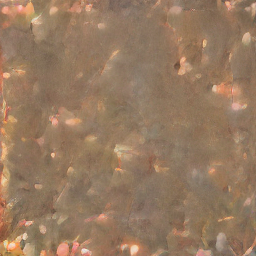

In [ ]:
import time
num_images = 1

# Set user inputs:
seed = 0 #@param {type:"number"}
torch.manual_seed(seed)
num_sampling_steps = 50 #@param {type:"slider", min:0, max:1000, step:1}
cfg_scale = 3 #@param {type:"slider", min:1, max:10, step:0.1}
class_labels = [207] * num_images
samples_per_row = 4 #@param {type:"number"}

# Create diffusion object:
diffusion = create_diffusion(str(num_sampling_steps))
start_time = time.time()

# Create sampling noise:
n = len(class_labels)
z = torch.randn(n, 4, latent_size, latent_size, device=device)
y = torch.tensor(class_labels, device=device)

# Setup classifier-free guidance:
z = torch.cat([z, z], 0)
y_null = torch.tensor([1000] * n, device=device)
y = torch.cat([y, y_null], 0)
model_kwargs = dict(y=y, cfg_scale=cfg_scale)

# Sample images:
samples = diffusion.p_sample_loop(
    model.forward_with_cfg, z.shape, z, clip_denoised=False,
    model_kwargs=model_kwargs, progress=True, device=device
)
samples, _ = samples.chunk(2, dim=0)  # Remove null class samples
samples = vae.decode(samples / 0.18215).sample
# Benchmark end
end_time = time.time()
print(f"Time to sample {n} images with {num_sampling_steps} steps: {end_time - start_time:.2f} seconds")

# Save and display images:
save_image(samples, "sample.png", nrow=int(samples_per_row),
           normalize=True, value_range=(-1, 1))
samples = Image.open("sample.png")
display(samples)

Original Model Structure:
DiT(
  (x_embedder): PatchEmbed(
    (proj): Conv2d(4, 1152, kernel_size=(2, 2), stride=(2, 2))
    (norm): Identity()
  )
  (t_embedder): TimestepEmbedder(
    (mlp): Sequential(
      (0): Linear(in_features=256, out_features=1152, bias=True)
      (1): SiLU()
      (2): Linear(in_features=1152, out_features=1152, bias=True)
    )
  )
  (y_embedder): LabelEmbedder(
    (embedding_table): Embedding(1001, 1152)
  )
  (blocks): ModuleList(
    (0-27): 28 x DiTBlock(
      (norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=False)
      (attn): Attention(
        (qkv): Linear(in_features=1152, out_features=3456, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=1152, out_features=1152, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (norm2): LayerNorm((1152,), eps=1e-06, elementwise_affine=False)
      (mlp): Mlp(
        (f

In [ ]:
!pip install xformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 19.4 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.2/253.2 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu124
    Uninstalling torch-2.5.1+cu124:
      Successfully uninstalled torch-2.5.1+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.18 requires torch<2.6,>=1.10, but you have torch 2.6.0 which is incompatible.
torchvision 0.20.1+cu124 requires torch==2.5.1, but you have torch 2.6.0 which is incompatible.
tor

In [ ]:
import torch
import torch.nn as nn
import xformers.ops as xops

class XFormersAttention(nn.Module):
    def __init__(self, dim, num_heads):
        super().__init__()
        self.dim = dim
        self.num_heads = num_heads
        self.head_dim = dim // num_heads

        # Define the query, key, and value projections
        self.qkv_proj = nn.Linear(dim, dim * 3)
        self.out_proj = nn.Linear(dim, dim)

    def forward(self, x):
        x = x


        B, N, C = x.shape  # Batch size, Sequence length, Embedding dimension

        # Project input to query, key, and value
        qkv = self.qkv_proj(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]  # Separate query, key, value

        # Apply xformers attention
        attn_output = xops.memory_efficient_attention(q, k, v)

        # Reshape and project the output
        attn_output = attn_output.transpose(1, 2).reshape(B, N, C)
        out = self.out_proj(attn_output)

        return out


In [ ]:
def replace_attention_with_xformers(model):
    """Replace Attention with XFormersAttention in all DiTBlocks."""
    for i, block in enumerate(model.blocks):
        if hasattr(block, 'attn'):
            block.attn = XFormersAttention(dim=1152, num_heads=16).to(device)
    print("Replaced Attention with XFormersAttention.")

# Apply the replacement:
replace_attention_with_xformers(model)


Replaced Attention with XFormersAttention.


Modified Model Structure:
DiT(
  (x_embedder): PatchEmbed(
    (proj): Conv2d(4, 1152, kernel_size=(2, 2), stride=(2, 2))
    (norm): Identity()
  )
  (t_embedder): TimestepEmbedder(
    (mlp): Sequential(
      (0): Linear(in_features=256, out_features=1152, bias=True)
      (1): SiLU()
      (2): Linear(in_features=1152, out_features=1152, bias=True)
    )
  )
  (y_embedder): LabelEmbedder(
    (embedding_table): Embedding(1001, 1152)
  )
  (blocks): ModuleList(
    (0-27): 28 x DiTBlock(
      (norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=False)
      (attn): XFormersAttention(
        (qkv_proj): Linear(in_features=1152, out_features=3456, bias=True)
        (out_proj): Linear(in_features=1152, out_features=1152, bias=True)
      )
      (norm2): LayerNorm((1152,), eps=1e-06, elementwise_affine=False)
      (mlp): Mlp(
        (fc1): Linear(in_features=1152, out_features=4608, bias=True)
        (act): GELU(approximate='tanh')
        (drop1): Dropout(p=0, inplace=False

In [ ]:
print(model)

DiT(
  (x_embedder): PatchEmbed(
    (proj): Conv2d(4, 1152, kernel_size=(2, 2), stride=(2, 2))
    (norm): Identity()
  )
  (t_embedder): TimestepEmbedder(
    (mlp): Sequential(
      (0): Linear(in_features=256, out_features=1152, bias=True)
      (1): SiLU()
      (2): Linear(in_features=1152, out_features=1152, bias=True)
    )
  )
  (y_embedder): LabelEmbedder(
    (embedding_table): Embedding(1001, 1152)
  )
  (blocks): ModuleList(
    (0-27): 28 x DiTBlock(
      (norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=False)
      (attn): XFormersAttention(
        (qkv_proj): Linear(in_features=1152, out_features=3456, bias=True)
        (out_proj): Linear(in_features=1152, out_features=1152, bias=True)
      )
      (norm2): LayerNorm((1152,), eps=1e-06, elementwise_affine=False)
      (mlp): Mlp(
        (fc1): Linear(in_features=1152, out_features=4608, bias=True)
        (act): GELU(approximate='tanh')
        (drop1): Dropout(p=0, inplace=False)
        (norm): Identity

In [ ]:
# Move model to GPU and convert to float16
model = model.to(device)

In [ ]:

def convert_and_load(model, checkpoint_path):
    # Load checkpoint
    checkpoint = torch.load(checkpoint_path, map_location='cpu')

    # Extract state_dict (adjust if needed)
    state_dict = checkpoint.get('state_dict', checkpoint)

    # Rename keys to match expected model structure
    new_state_dict = {}
    renamed_keys = 0

    for k, v in state_dict.items():
        new_k = k

        # Fix attention layers' qkv and proj names
        if 'attn.qkv.' in k:
            new_k = k.replace('attn.qkv.', 'attn.qkv_proj.')
        elif 'attn.proj.' in k:
            new_k = k.replace('attn.proj.', 'attn.out_proj.')

        # Track renamed keys
        if new_k != k:
            renamed_keys += 1

        new_state_dict[new_k] = v

    # Load the fixed state dict with strict=False to handle any remaining mismatches
    model.load_state_dict(new_state_dict, strict=False)

    # Print results
    print(f"Total keys in checkpoint: {len(state_dict)}")
    print(f"Renamed keys: {renamed_keys}")
    print(f"Missing keys: {len(model.state_dict()) - len(new_state_dict)} (ignored)")
    print("Model loaded successfully with updated keys!")

# Example usage:
# from your_model_file import DiT
# model = DiT()  # Initialize your model
# convert_and_load(model, 'path/to/your/checkpoint.pth')




<ipython-input-62-d040a66126da>:29: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  0%|          | 0/50 [00:00<?, ?it/s]

Time to sample 10 images(XFORMERS) with 50 steps: 20.65 seconds


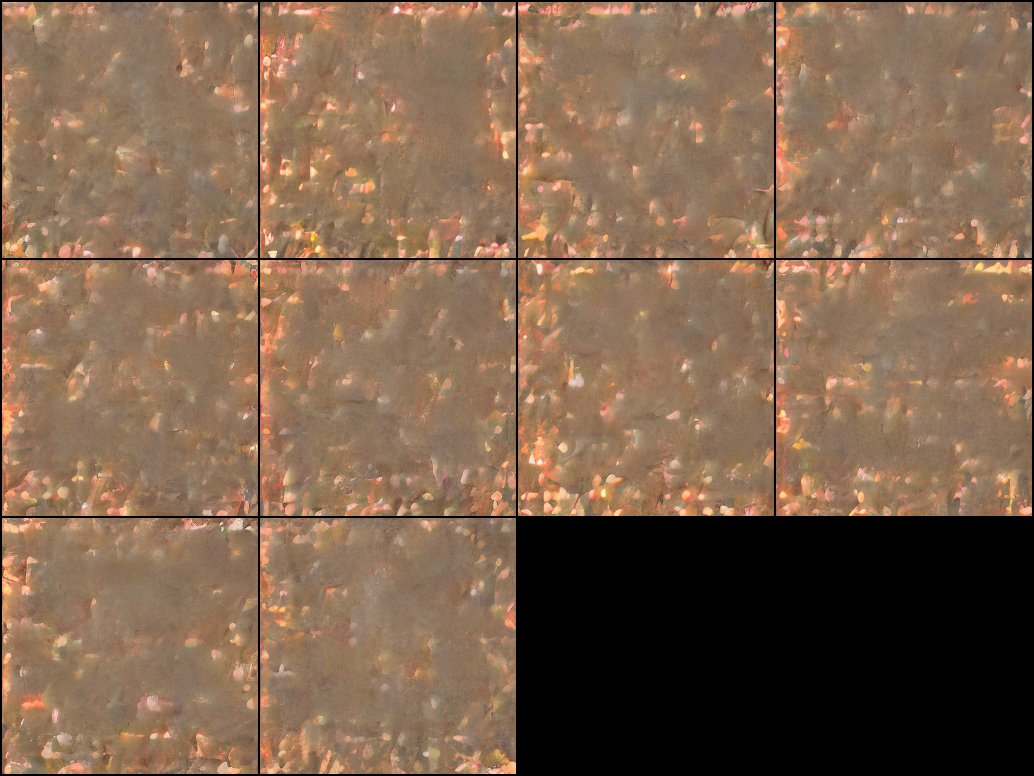

In [ ]:
import time
from torch.cuda.amp import autocast


num_images = 10

# Set user inputs:
seed = 0 #@param {type:"number"}
torch.manual_seed(seed)
num_sampling_steps = 50 #@param {type:"slider", min:0, max:1000, step:1}
cfg_scale = 3 #@param {type:"slider", min:1, max:10, step:0.1}
class_labels = [207] * num_images
samples_per_row = 4 #@param {type:"number"}

# Create diffusion object:
diffusion = create_diffusion(str(num_sampling_steps))
start_time = time.time()

# Create sampling noise:
n = len(class_labels)
z = torch.randn(n, 4, latent_size, latent_size, device=device)
y = torch.tensor(class_labels, device=device)

# Setup classifier-free guidance:
z = torch.cat([z, z], 0)
y_null = torch.tensor([1000] * n, device=device)
y = torch.cat([y, y_null], 0)
model_kwargs = dict(y=y, cfg_scale=cfg_scale)
with autocast():
    samples = diffusion.p_sample_loop(
        model.forward_with_cfg, z.shape, z, clip_denoised=False,
        model_kwargs=model_kwargs, progress=True, device=device
    )
samples, _ = samples.chunk(2, dim=0)  # Remove null class samples
samples = vae.decode(samples / 0.18215).sample
# Benchmark end
end_time = time.time()
print(f"Time to sample {n} images(XFORMERS) with {num_sampling_steps} steps: {end_time - start_time:.2f} seconds")

# Save and display images:
save_image(samples, "sample.png", nrow=int(samples_per_row),
           normalize=True, value_range=(-1, 1))
samples = Image.open("sample.png")
display(samples)

In [ ]:
# Check the dtype of all model parameters
for name, param in model.named_parameters():
    print(f"{name}: {param.dtype}")

# Check the dtype of inputs
print(f"z dtype: {z.dtype}, y dtype: {y.dtype}")
